# Pedicting the number of EV chargers that a county should have based on given socio-economic features
##By:
- Dhiman Sarkar

# Program Initialization Section

Import packages and read dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
#read dataset
df_ev = pd.read_csv('/content/drive/MyDrive/EV Charging Stations/ML_dataset.csv')

# Initial Data Investigation Section

## Descriptive analytic

Data explore

In [3]:
#df_ev.head(10)
df_ev.info()
df_ev.shape
df_ev.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3212 entries, 0 to 3211
Data columns (total 30 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FIP                                                   3212 non-null   int64  
 1   Area_Name                                             3212 non-null   object 
 2   State                                                 3212 non-null   object 
 3   State.1                                               3212 non-null   object 
 4   County State                                          3212 non-null   object 
 5   POP_ESTIMATE_2019                                     3212 non-null   int64  
 6   Median_Household_Income_2019                          3133 non-null   float64
 7   avg_commute_time_by_state                             3212 non-null   float64
 8   Median Real Estate                                    3109

,FIP,POP_ESTIMATE_2019,Median_Household_Income_2019,avg_commute_time_by_state,Median Real Estate,Married-couple family!!Householder 15 to 34 years,Married-couple family!!Householder 35 to 64 years,Married-couple family!!Householder 65 years and over,Total Number of EV charger BASED ON FIP or County,Regular Gasoline By State,Regular Diesel By State,AVG_electric_price (cents/kWh)_by_state,State Sales Tax Rate,states_sales_tax_ratio,Food Environment Index,%of physically inactive,physical inactivity rate,Annual Average Violent Crimes,Violent Crime Rate,# Workers who Drive Alone,costIndex,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost
count,3212.000000,3.212000e+03,3133.00000,3212.000000,3.109000e+03,3210.000000,3.210000e+03,3210.000000,3212.00000,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3.212000e+03,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000
mean,31358.442403,1.062264e+05,55742.35557,24.695548,1.646951e+05,2597.014953,1.139151e+04,4252.632087,13.42746,2.781242,3.021798,9.941640,5.378354,0.053784,7.218088,25.248537,0.252485,374.764944,230.838961,4.748800e+04,97.352010,98.476835,94.181685,97.834046,98.493810,99.142470
std,16298.223866,3.652077e+05,14506.32413,3.713022,1.065870e+05,7649.734825,3.482659e+04,11124.617426,62.24140,0.229159,0.203987,2.209057,1.522213,0.015222,1.710449,7.844829,0.078448,1706.388969,197.211424,1.580483e+05,14.142405,8.494319,33.585910,9.544382,12.035644,9.082179
min,1001.000000,8.600000e+01,24732.00000,17.200000,2.640000e+04,0.000000,7.000000e+00,2.000000,0.00000,2.576000,2.753000,7.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,86.100000,88.900000,70.100000,82.900000,83.600000,85.600000
25%,19028.500000,1.113025e+04,46255.00000,22.200000,1.011000e+05,273.250000,1.260750e+03,610.000000,0.00000,2.640000,2.908000,8.780000,4.500000,0.045000,6.800000,21.775000,0.217750,10.000000,97.156029,4.189250e+03,89.200000,92.900000,73.900000,91.800000,91.400000,94.200000
50%,30016.000000,2.611300e+04,53341.00000,24.800000,1.343000e+05,660.500000,2.928500e+03,1325.500000,2.00000,2.708000,3.007000,9.560000,6.000000,0.060000,7.600000,25.900000,0.259000,46.750000,184.964416,1.030050e+04,91.500000,96.600000,85.100000,97.300000,94.300000,97.600000
75%,46105.500000,6.731450e+04,62108.00000,27.200000,1.899000e+05,1804.000000,7.589250e+03,3369.500000,6.00000,2.831000,3.082000,10.020000,6.250000,0.062500,8.200000,30.200000,0.302000,166.000000,318.552035,2.880675e+04,99.800000,102.500000,95.400000,102.300000,100.900000,100.100000
max,72153.000000,1.003911e+07,151806.00000,33.600000,1.176700e+06,180853.000000,1.017460e+06,297345.000000,1904.00000,3.936000,4.190000,28.720000,7.250000,0.072500,10.000000,50.400000,0.504000,49548.500000,1819.514407,4.811408e+06,192.900000,169.300000,318.600000,172.700000,148.600000,150.900000


In [4]:
#Check the missing value
df_ev.isnull().sum()

FIP                                                       0
Area_Name                                                 0
State                                                     0
State.1                                                   0
County State                                              0
POP_ESTIMATE_2019                                         0
Median_Household_Income_2019                             79
avg_commute_time_by_state                                 0
Median Real Estate                                      103
Married-couple family!!Householder 15 to 34 years         2
Married-couple family!!Householder 35 to 64 years         2
Married-couple family!!Householder 65 years and over      2
Total Number of EV charger BASED ON FIP or County         0
Regular Gasoline By State                                78
Regular Diesel By State                                  78
AVG_electric_price (cents/kWh)_by_state                  78
State Sales Tax Rate                    

In [5]:
#fill the missing median real estate with median
df_ev['Median Real Estate'] = df_ev['Median Real Estate'].fillna(df_ev.groupby('State')['Median Real Estate'].transform('median'))

In [6]:
# Drop the consistent missing value (78)
# drop all the puerto rico
df_ev.dropna(subset=['Median_Household_Income_2019'], inplace=True)

In [7]:
# Drop two missing value in 'Married-couple family!!Householder 35 to 64 years'
df_ev.dropna(subset=['Married-couple family!!Householder 35 to 64 years'], inplace= True)

In [8]:
#Check null value again
df_ev.isnull().sum()

FIP                                                     0
Area_Name                                               0
State                                                   0
State.1                                                 0
County State                                            0
POP_ESTIMATE_2019                                       0
Median_Household_Income_2019                            0
avg_commute_time_by_state                               0
Median Real Estate                                      0
Married-couple family!!Householder 15 to 34 years       0
Married-couple family!!Householder 35 to 64 years       0
Married-couple family!!Householder 65 years and over    0
Total Number of EV charger BASED ON FIP or County       0
Regular Gasoline By State                               0
Regular Diesel By State                                 0
AVG_electric_price (cents/kWh)_by_state                 0
State Sales Tax Rate                                    0
states_sales_t

In [9]:
# Change the column names
df_ev = df_ev.rename(columns = {
                    'State.1' : 'State_Name',
                    'POP_ESTIMATE_2019' : 'Population',
                    'Median_Household_Income_2019' : 'Median_Household_Income',
                    'avg_commute_time_by_state' : 'Avg_Commute_Time',
                    'Median Real Estate' : 'Median_Real_Estate',
                    'Married-couple family!!Householder 15 to 34 years' : 'Married_15_34',
                    'Married-couple family!!Householder 35 to 64 years' : 'Married_35_64',
                    'Married-couple family!!Householder 65 years and over' : 'Married_64',
                    'Total Number of EV charger BASED ON FIP or County' : 'EV_Number',
                    'Regular Gasoline By State' : 'Gas_Price',
                    'Regular Diesel By State' : 'Diesel_Price',
                    'AVG_electric_price (cents/kWh)_by_state' : 'Avg_Electric_Price',
                    'State Sales Tax Rate' : 'Sales_Tax',
                    'states_sales_tax_ratio' : 'Sales_Tax_Ratio',
                    'Food Environment Index' : 'Food_Environment_Index',
                    '%of physically inactive' : '%of_Physically_Inactive',
                    'physical inactivity rate' : 'Physical_Inactivity_Rate',
                    'Annual Average Violent Crimes' : 'Avg_Violent_Crime',
                    'Violent Crime Rate' : 'Violent_Crime_Rate',
                    '# Workers who Drive Alone' : 'Number_of_Drive_Alone',
                    'costIndex' : 'Cost_Index',
                    'groceryCost' : 'Grocery_Cost',
                    'housingCost' : 'Housing_Cost',
                    'utilitiesCost' : 'Utilities_Cost',
                    'transportationCost' : 'Transportation_Cost',
                    'miscCost' : 'Misc_Cost'
                                })

In [10]:
# Check the header again
df_ev.head()
df_ev.shape

(3131, 30)

## Building pairplot with colors

In [11]:
#Separate EV from the main df
ev = df_ev.loc[:, ['EV_Number']]
#replace non-zero with a value of 1
ev[ev != 0] = 1
#convert ev value to string
ev = ev.applymap(str)
#Replace 0 with 'No' and 1 with 'Yes'
ev['EV_Number'] = ev['EV_Number'].map({'0':'No', '1':'Yes'})
ev.tail()

,EV_Number
3129,Yes
3130,Yes
3131,Yes
3132,No
3133,No


In [12]:
df_ev['ev'] = ev
df_ev.tail()

,FIP,Area_Name,State,State_Name,County State,Population,Median_Household_Income,Avg_Commute_Time,Median_Real_Estate,Married_15_34,Married_35_64,Married_64,EV_Number,Gas_Price,Diesel_Price,Avg_Electric_Price,Sales_Tax,Sales_Tax_Ratio,Food_Environment_Index,%of_Physically_Inactive,Physical_Inactivity_Rate,Avg_Violent_Crime,Violent_Crime_Rate,Number_of_Drive_Alone,Cost_Index,Grocery_Cost,Housing_Cost,Utilities_Cost,Transportation_Cost,Misc_Cost,ev
3129,56037,Sweetwater County,WY,Wyoming,Sweetwater County Wyoming,42343,80639.0,17.9,210800.0,1673.0,5505.0,1356.0,3,2.915,3.206,8.1,4.0,0.04,7.5,24.4,0.244,135.0,300.494146,21188,89.3,98.7,72.3,87.3,99.3,94.9,Yes
3130,56039,Teton County,WY,Wyoming,Teton County Wyoming,23464,98837.0,17.9,888400.0,499.0,2784.0,1077.0,28,2.915,3.206,8.1,4.0,0.04,8.3,10.8,0.108,0.0,0.000000,14096,89.3,98.7,72.3,87.3,99.3,94.9,Yes
3131,56041,Uinta County,WY,Wyoming,Uinta County Wyoming,20226,70756.0,17.9,179400.0,836.0,2759.0,930.0,1,2.915,3.206,8.1,4.0,0.04,7.3,25.1,0.251,14.0,71.006517,9155,89.3,98.7,72.3,87.3,99.3,94.9,Yes
3132,56043,Washakie County,WY,Wyoming,Washakie County Wyoming,7805,55122.0,17.9,170000.0,226.0,1054.0,535.0,0,2.915,3.206,8.1,4.0,0.04,8.0,28.7,0.287,6.5,78.266105,3663,89.3,98.7,72.3,87.3,99.3,94.9,No
3133,56045,Weston County,WY,Wyoming,Weston County Wyoming,6927,59410.0,17.9,170500.0,224.0,911.0,477.0,0,2.915,3.206,8.1,4.0,0.04,7.7,25.5,0.255,9.5,157.128680,3135,89.3,98.7,72.3,87.3,99.3,94.9,No


In [13]:
# Choice variables
ev_pplot = df_ev.loc[:, ['EV_Number', 'Cost_Index', 'Housing_Cost', 'Grocery_Cost', 
                         'Utilities_Cost', 'Transportation_Cost', 'Avg_Commute_Time', 'Gas_Price', 'ev', 'Population']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.08, 'Pairplot')

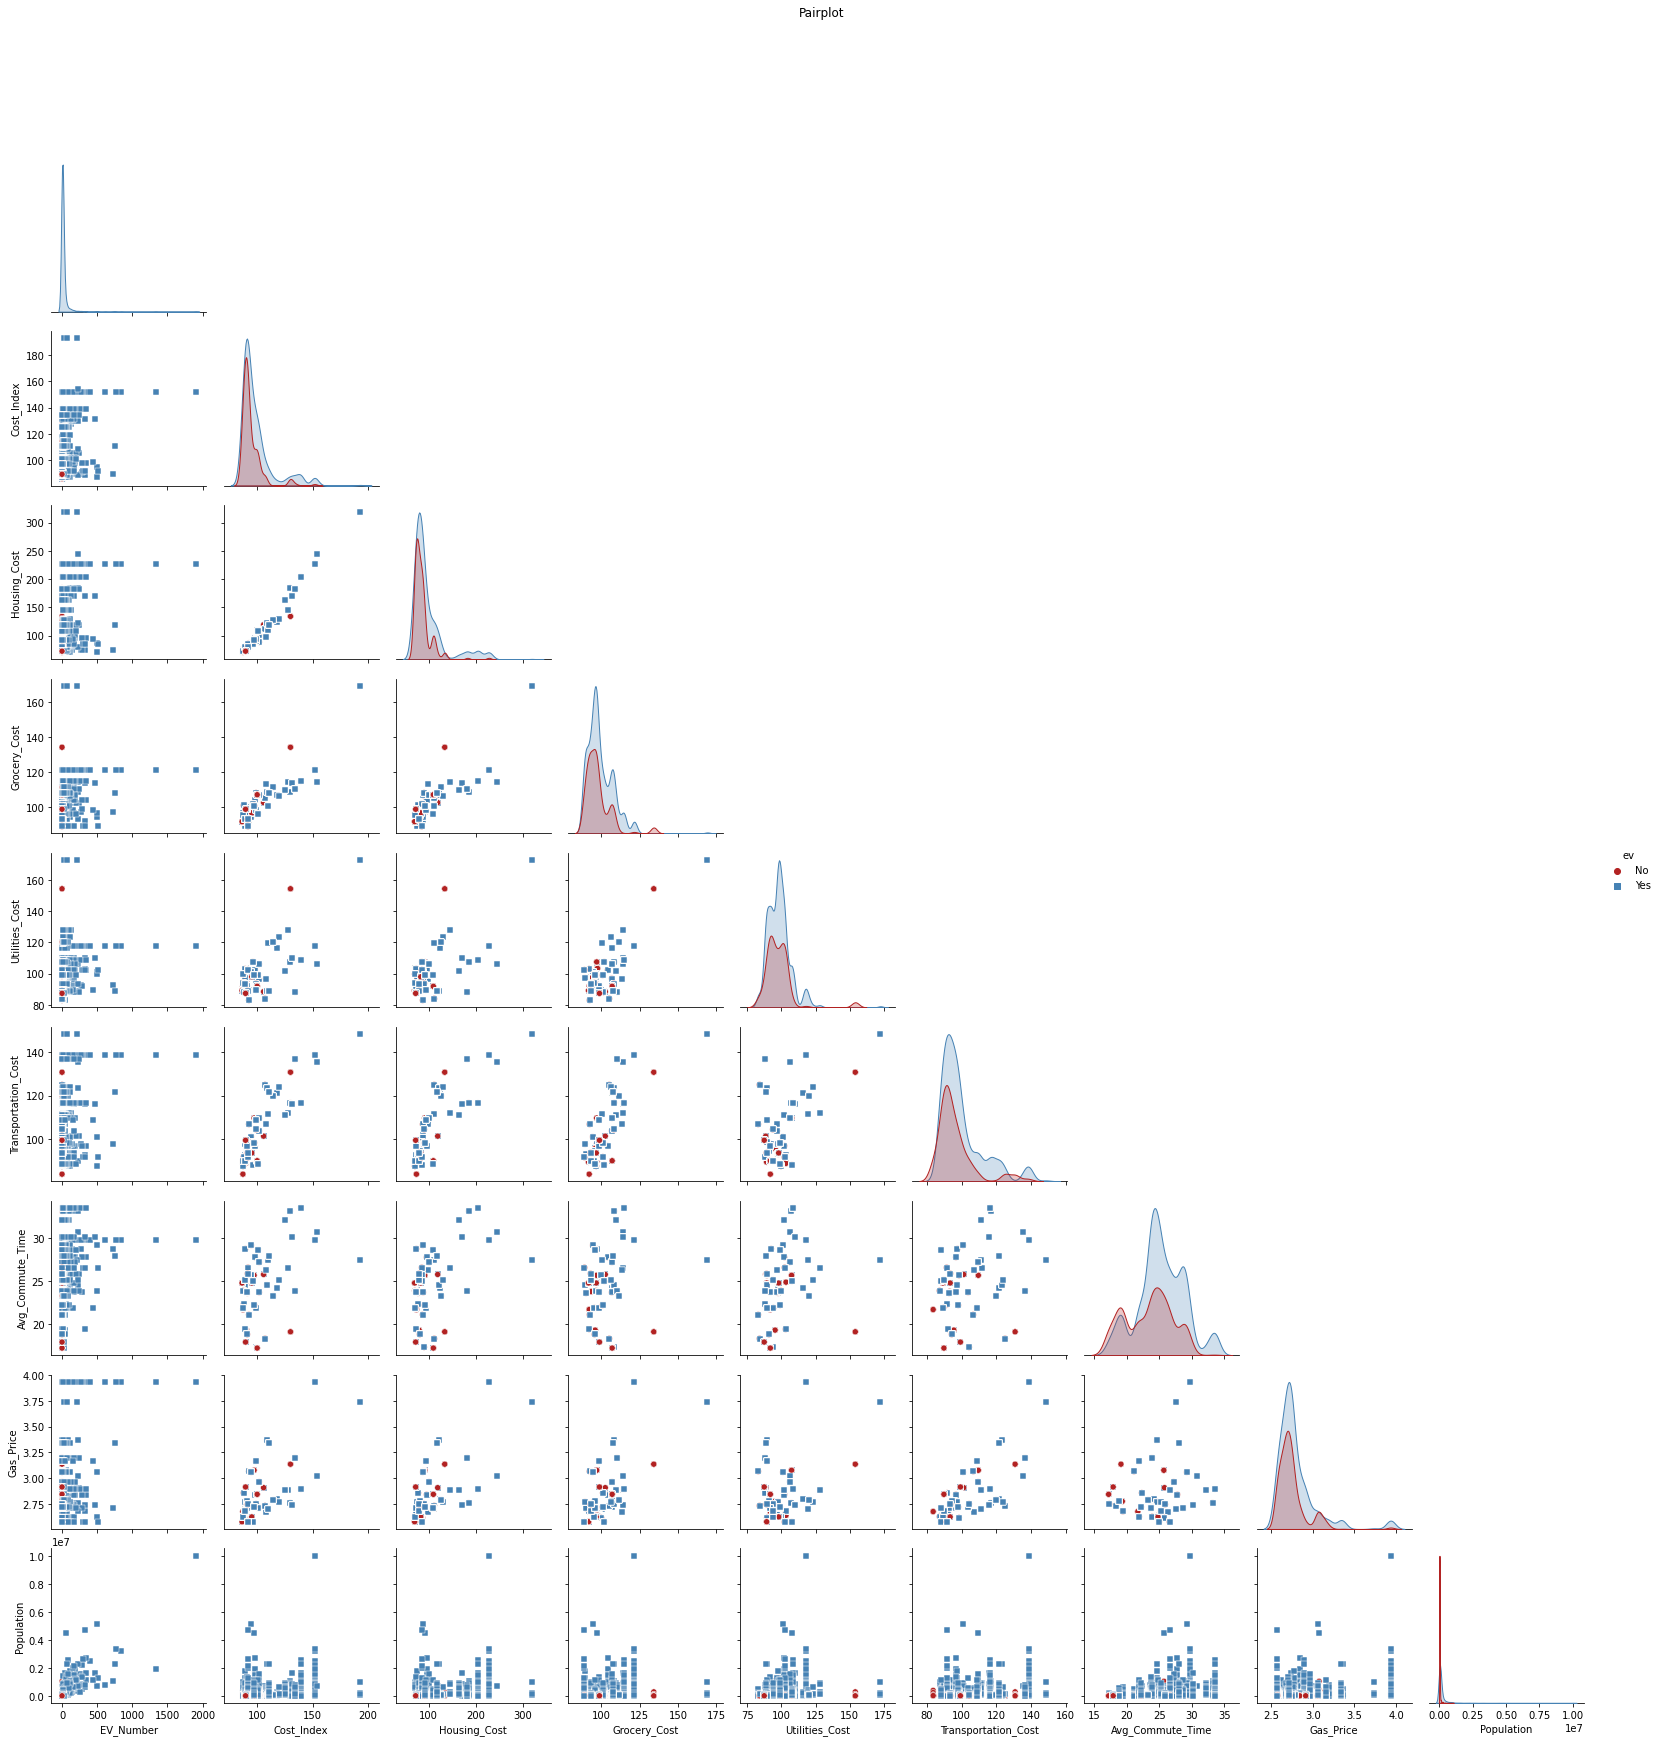

In [14]:
#corner = True -> to eliminate the redundancy of the top right half of the pairplot
pplot = sns.pairplot(ev_pplot, hue = 'ev', markers=["o", "s"], corner=True, palette=["firebrick", "steelblue"])
pplot.fig.suptitle("Pairplot", y=1.08)

In [15]:
#remove ev
df_ev.drop('ev', axis=1, inplace=True)

## Data visualization
#### EV charging stations vs income and population
#### Household Income By State (might be replaced tbd)
#### Number of EV charging stations by State

###Analyzing the relationship between EV charging stations and median household income & population

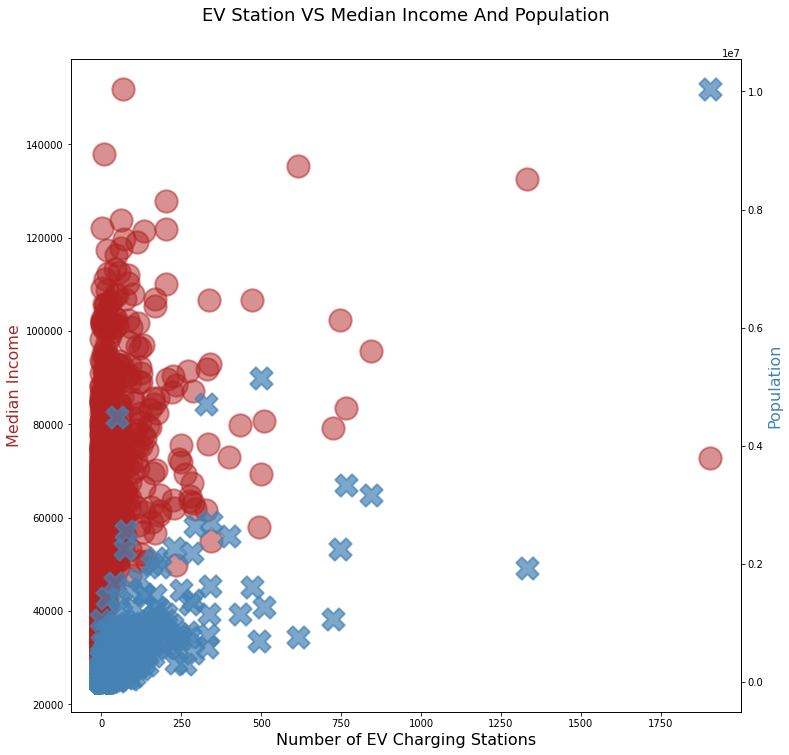

In [16]:
#scatter plot with twin axis EV number VS household income + population

# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (12,12))
# make a plot
ax.scatter(df_ev['EV_Number'], df_ev['Median_Household_Income'], color="firebrick", marker="o", s=500, alpha=0.5, linewidth=2)
# set x-axis label
ax.set_xlabel("Number of EV Charging Stations",fontsize=16)
# set y-axis label
ax.set_ylabel("Median Income",color="brown",fontsize=16)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.scatter(df_ev['EV_Number'], df_ev['Population'],color="steelblue",marker="X", alpha=0.7, s=500, linewidth=2)
ax2.set_ylabel("Population",color="steelblue",fontsize=16)
plt.title('EV Station VS Median Income And Population', y = 1.05, fontsize=18)
plt.show()

### Cost of Living Index By State

In [17]:
#Find average for the cost of living
cost_id = df_ev.groupby("State")['Cost_Index'].mean().mean()
cost_id

105.6078431372549

In [18]:
#Cost of living group by state
costid = pd.DataFrame(df_ev.groupby("State")['Cost_Index'].mean())

#Separating the bars with two colors
costid['colors'] = ['firebrick' if x < cost_id else 'steelblue' for x in costid['Cost_Index']]
costid.sort_values('Cost_Index', inplace=True)

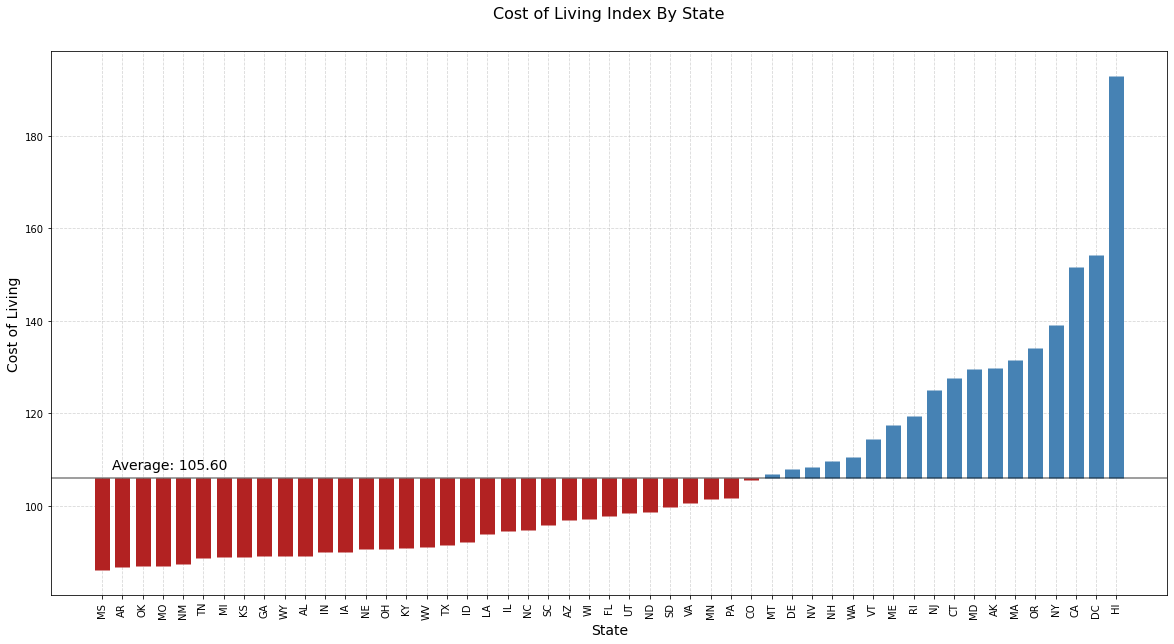

In [19]:
plt.figure(figsize=(20,10))
#linewidth is to increase bar width
plt.vlines(x=costid.index, ymin=106, ymax=costid['Cost_Index'], color=costid.colors, alpha=1, linewidth=15, linestyles='solid')
plt.xlabel('State', fontsize = 14)
plt.xticks(rotation = 90)
plt.ylabel('Cost of Living', fontsize = 14)
plt.title('Cost of Living Index By State', fontsize = 16, y = 1.05)
#adding horizontal line
plt.axhline(y=106, color='black', linestyle='-', alpha = 0.5)

#Adding text (xcoordinate, ycoordinate, text)
plt.text(0.5, 108, "Average: 105.60", fontsize = 14)

plt.grid(linestyle='--', alpha=0.5)

### Analyzing the number of EV charging stations by State

In [20]:
EV_Number = round(df_ev.groupby("State")['EV_Number'].sum().sort_values(), 2)
EV_Number = pd.DataFrame(EV_Number)

In [21]:
#Arkansas and Arizona have 0 value. Hence, Squarify might give error
EV_Number = EV_Number.drop(index= ['AK', 'AR'])
EV_Number.sort_values('EV_Number', ascending=False, inplace=True)

In [22]:
pip install squarify

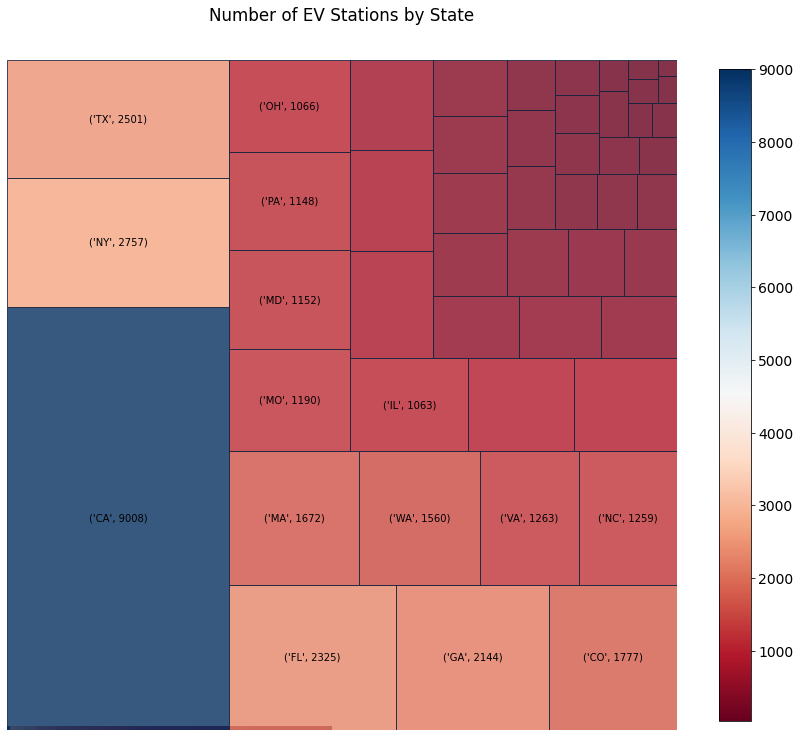

In [23]:
import squarify 
import matplotlib
#building the dimension and space for the plot
#choosing color: https://www.color-hex.com/color-names.html
fig, ax = plt.subplots(1, figsize = (15,15))

#Building the color based on min and max
cmap = matplotlib.cm.RdBu
min, max = EV_Number.min(), EV_Number.max()
norm = matplotlib.colors.Normalize(vmin=min, vmax=max)
colors = [cmap(norm(value)) for value in EV_Number.EV_Number]

#Creating an automation for plotting the label into the map
label = [label for label in zip(EV_Number.index, EV_Number.EV_Number)]

squarify.plot(sizes=EV_Number['EV_Number'], label=label[:15], alpha = 0.8, color=colors, edgecolor= '#12253F')
plt.rc('font', size=14) 
# y = to add gap between graph and title
plt.title('Number of EV Stations by State', y = 1.05)

#building colorbar
img = plt.imshow([EV_Number['EV_Number']], cmap=cmap)
fig.colorbar(img, orientation="vertical", shrink=.80)

plt.axis('off')
plt.show()

# Splitting Dataset into X (Variables) and Y (Target)



In [24]:
X = df_ev.loc[:, df_ev.columns != "EV_Number"]
X.head()

,FIP,Area_Name,State,State_Name,County State,Population,Median_Household_Income,Avg_Commute_Time,Median_Real_Estate,Married_15_34,Married_35_64,Married_64,Gas_Price,Diesel_Price,Avg_Electric_Price,Sales_Tax,Sales_Tax_Ratio,Food_Environment_Index,%of_Physically_Inactive,Physical_Inactivity_Rate,Avg_Violent_Crime,Violent_Crime_Rate,Number_of_Drive_Alone,Cost_Index,Grocery_Cost,Housing_Cost,Utilities_Cost,Transportation_Cost,Misc_Cost
0,1001,Autauga County,AL,Alabama,Autauga County Alabama,55869,58233.0,24.9,160200.0,1979.0,7205.0,2425.0,2.64,2.872,9.83,4.0,0.04,6.7,30.6,0.306,148.5,272.282220,24635,89.3,97.4,71.5,103.3,88.6,90.8
1,1003,Baldwin County,AL,Alabama,Baldwin County Alabama,223234,59871.0,24.9,231100.0,5258.0,24656.0,12972.0,2.64,2.872,9.83,4.0,0.04,7.8,24.7,0.247,408.0,203.660396,93141,89.3,97.4,71.5,103.3,88.6,90.8
2,1005,Barbour County,AL,Alabama,Barbour County Alabama,24686,35972.0,24.9,94000.0,528.0,2164.0,1266.0,2.64,2.872,9.83,4.0,0.04,5.5,28.0,0.280,105.5,414.277861,8231,89.3,97.4,71.5,103.3,88.6,90.8
3,1007,Bibb County,AL,Alabama,Bibb County Alabama,22394,47918.0,24.9,97200.0,389.0,2269.0,835.0,2.64,2.872,9.83,4.0,0.04,7.6,33.4,0.334,19.5,89.349126,8167,89.3,97.4,71.5,103.3,88.6,90.8
4,1009,Blount County,AL,Alabama,Blount County Alabama,57826,52902.0,24.9,133800.0,1692.0,7309.0,2908.0,2.64,2.872,9.83,4.0,0.04,7.9,33.3,0.333,279.0,482.690611,21690,89.3,97.4,71.5,103.3,88.6,90.8


In [25]:
Y = df_ev['EV_Number']
Y = pd.DataFrame(Y)
Y.head(10)

,EV_Number
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [26]:
# Only save the numerical features in for our modeling
X = df_ev.loc[:,['Population', 'Median_Household_Income', 'Avg_Commute_Time', 'Median_Real_Estate',
       'Married_15_34', 'Married_35_64', 'Gas_Price',
       'Avg_Electric_Price', 'Sales_Tax_Ratio', 'Food_Environment_Index',
       'Physical_Inactivity_Rate', 'Avg_Violent_Crime', 'Violent_Crime_Rate',
       'Number_of_Drive_Alone', 'Cost_Index', 'Grocery_Cost', 'Housing_Cost',
       'Utilities_Cost', 'Transportation_Cost']]
X.head()

,Population,Median_Household_Income,Avg_Commute_Time,Median_Real_Estate,Married_15_34,Married_35_64,Gas_Price,Avg_Electric_Price,Sales_Tax_Ratio,Food_Environment_Index,Physical_Inactivity_Rate,Avg_Violent_Crime,Violent_Crime_Rate,Number_of_Drive_Alone,Cost_Index,Grocery_Cost,Housing_Cost,Utilities_Cost,Transportation_Cost
0,55869,58233.0,24.9,160200.0,1979.0,7205.0,2.64,9.83,0.04,6.7,0.306,148.5,272.282220,24635,89.3,97.4,71.5,103.3,88.6
1,223234,59871.0,24.9,231100.0,5258.0,24656.0,2.64,9.83,0.04,7.8,0.247,408.0,203.660396,93141,89.3,97.4,71.5,103.3,88.6
2,24686,35972.0,24.9,94000.0,528.0,2164.0,2.64,9.83,0.04,5.5,0.280,105.5,414.277861,8231,89.3,97.4,71.5,103.3,88.6
3,22394,47918.0,24.9,97200.0,389.0,2269.0,2.64,9.83,0.04,7.6,0.334,19.5,89.349126,8167,89.3,97.4,71.5,103.3,88.6
4,57826,52902.0,24.9,133800.0,1692.0,7309.0,2.64,9.83,0.04,7.9,0.333,279.0,482.690611,21690,89.3,97.4,71.5,103.3,88.6


# Model 1: Linear Regessions


##OLS (Multiple Simple Linear Regression): Model A

In [27]:
#OLS Regression to check for high p-values (>0.05)
import statsmodels.api as sm
model = sm.OLS(Y, X)
model = model.fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                 OLS Regression Results                                
Dep. Variable:              EV_Number   R-squared (uncentered):                   0.734
Model:                            OLS   Adj. R-squared (uncentered):              0.733
Method:                 Least Squares   F-statistic:                              452.6
Date:                Sun, 20 Jun 2021   Prob (F-statistic):                        0.00
Time:                        13:18:08   Log-Likelihood:                         -15413.
No. Observations:                3131   AIC:                                  3.086e+04
Df Residuals:                    3112   BIC:                                  3.098e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [28]:
##Found the following variables with high p-values (>0.05). Therefore the following variables can be dropped:
## "Transportation_Cost", "Utilities_Cost", "Housing_Cost", "Grocery_Cost", "Cost_Index", "Violent_Crime_Rate", "Physical_Inactivity_Rate", "Food_Environment_Index"
## "Sales_Tax_Ratio", "Avg_Electric_Price", "Married_35_64", "Avg_Commute_Time"

In [29]:
#Creating X1 after dropping variables
X1 = df_ev.loc[:,['Population', 'Median_Household_Income', 'Median_Real_Estate', 'Avg_Violent_Crime','Number_of_Drive_Alone',]]

### Standardizing and scaling for a better analysis and prediction

In [30]:
X.columns

Index(['Population', 'Median_Household_Income', 'Avg_Commute_Time',
       'Median_Real_Estate', 'Married_15_34', 'Married_35_64', 'Gas_Price',
       'Avg_Electric_Price', 'Sales_Tax_Ratio', 'Food_Environment_Index',
       'Physical_Inactivity_Rate', 'Avg_Violent_Crime', 'Violent_Crime_Rate',
       'Number_of_Drive_Alone', 'Cost_Index', 'Grocery_Cost', 'Housing_Cost',
       'Utilities_Cost', 'Transportation_Cost'],
      dtype='object')

In [31]:
scaled_features = X.copy()

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
col_names = ['Population', 'Median_Household_Income', 'Avg_Commute_Time', 'Median_Real_Estate',
       'Married_15_34', 'Married_35_64', 'Gas_Price',
       'Avg_Electric_Price', 'Sales_Tax_Ratio', 'Food_Environment_Index',
       'Physical_Inactivity_Rate', 'Avg_Violent_Crime', 'Violent_Crime_Rate',
       'Number_of_Drive_Alone', 'Cost_Index', 'Grocery_Cost', 'Housing_Cost',
       'Utilities_Cost', 'Transportation_Cost']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features

print(scaled_features)


      Population  Median_Household_Income  ...  Utilities_Cost  Transportation_Cost
0      -0.146171                 0.173017  ...        0.582106            -0.822349
1       0.354992                 0.286038  ...        0.582106            -0.822349
2      -0.239546                -1.362971  ...        0.582106            -0.822349
3      -0.246410                -0.538708  ...        0.582106            -0.822349
4      -0.140311                -0.194817  ...        0.582106            -0.822349
...          ...                      ...  ...             ...                  ...
3129   -0.186674                 1.719010  ...       -1.111914             0.069185
3130   -0.243206                 2.974655  ...       -1.111914             0.069185
3131   -0.252902                 1.037093  ...       -1.111914             0.069185
3132   -0.290095                -0.041639  ...       -1.111914             0.069185
3133   -0.292725                 0.254229  ...       -1.111914             0

In [32]:
scaled_features.head(5)
scaled_features.shape
# In case we need to inverse the transformation
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform

(3131, 19)

In [33]:
X = scaled_features.loc[:,['Population', 'Median_Household_Income', 'Avg_Commute_Time', 'Median_Real_Estate',
       'Married_15_34', 'Married_35_64', 'Gas_Price',
       'Avg_Electric_Price', 'Sales_Tax_Ratio', 'Food_Environment_Index',
       'Physical_Inactivity_Rate', 'Avg_Violent_Crime', 'Violent_Crime_Rate',
       'Number_of_Drive_Alone', 'Cost_Index', 'Grocery_Cost', 'Housing_Cost',
       'Utilities_Cost', 'Transportation_Cost']]


In [34]:
from sklearn.model_selection import train_test_split

# split into train test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2191, 19) (940, 19) (2191, 1) (940, 1)


##OLS Multiple Simple Linear Regression: Model B (dropped variables)

In [35]:
#OLS Regression Result with dropped variables
import statsmodels.api as sm
model = sm.OLS(Y, X1)
model = model.fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              EV_Number   R-squared (uncentered):                   0.723
Model:                            OLS   Adj. R-squared (uncentered):              0.723
Method:                 Least Squares   F-statistic:                              1635.
Date:                Sun, 20 Jun 2021   Prob (F-statistic):                        0.00
Time:                        13:18:08   Log-Likelihood:                         -15476.
No. Observations:                3131   AIC:                                  3.096e+04
Df Residuals:                    3126   BIC:                                  3.099e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

##Multiple Linear Regression: Model C



In [36]:
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)
model = LinearRegression().fit(X, Y)
r_square = model.score(X, Y)
print("Coefficient of Determination:", r_square)
print("Intercept:", model.intercept_)
print("Slope:", model.coef_)

Coefficient of Determination: 0.7215753330674689
Intercept: [13.76876397]
Slope: [[-1.65636894e+02 -6.20293608e+00 -1.51883789e+00  1.00318031e+01
  -1.54295794e+01 -7.76331377e+00  6.15988169e+00  5.62191116e-01
   3.75105239e-01 -1.04560859e+00  4.03314192e-02 -1.38372182e+01
   5.34657637e-01  2.48103408e+02 -7.47128717e+00 -1.78670953e+00
   8.03050954e+00  5.15720516e-01 -8.90006270e-01]]


In [37]:
y_pred = model.predict(X)
print("Predicted Response:", y_pred, sep="\n")

Predicted Response:
[[-0.24342627]
 [15.43849899]
 [-1.22676714]
 ...
 [ 1.22038264]
 [ 5.7868356 ]
 [ 4.06742996]]


In [38]:
y_pred = model.intercept_ + np.sum(model.coef_ * X, axis=1)
print("Predicted Response:", y_pred, sep="\n")

Predicted Response:
0       -0.243426
1       15.438499
2       -1.226767
3       -6.629135
4       -6.871865
          ...    
3129     4.860096
3130    61.581106
3131     1.220383
3132     5.786836
3133     4.067430
Length: 3131, dtype: float64


##Polynomial Linear Regression: Model D

In [39]:
# Step 1: Import packages
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 2b: Transform input data
X_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

# Step 3: Create a model and fit it

model = LinearRegression().fit(X_, Y)

# Step 4: Get results
r_sq = model.score(X_, Y)
intercept, coefficients = model.intercept_, model.coef_

# Step 5: Predict
y_pred = model.predict(X_)

print('coefficient of determination:', r_sq)
print('intercept:', intercept)
print('coefficients:', coefficients, sep='\n')
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.9504071289742897
intercept: [-7.65493446e+09]
coefficients:
[[-1.48627549e+02  2.60840691e+00  6.40861418e+09  5.35204981e+00
  -2.54271469e+01  4.12383912e+01  9.96231891e+08 -2.51048451e+10
   5.05602359e+09 -8.32242619e+00 -1.69665751e+00  6.82897628e+01
  -6.64230608e+00  1.30570438e+02 -1.50151164e+10  3.37386743e+10
  -1.93739912e+10  3.36391340e+09  9.86282912e+08  2.54109862e+01
   6.12491898e+00  4.87233242e+01 -4.74315803e+01 -7.09436955e+01
   2.25883662e+02  6.63507130e+01 -5.25067106e+01 -5.17101391e+01
   2.13477127e+01  6.87689621e+01  3.70179961e+01 -4.41371154e+01
  -2.10767142e+02  8.80100525e+02 -4.62984402e+01 -6.34798579e+02
  -4.34525030e+01 -2.01937501e+02  1.35965967e+00  8.94966125e-01
  -3.93092155e+00 -1.38569574e+01  1.32771435e+01  3.79233360e-02
   2.00810337e+00 -1.75190163e+00 -1.05612659e+00 -1.41511273e+00
   3.97456770e+01 -2.09065437e+00 -1.48091941e+01  5.06688213e+00
  -9.11162376e-01 -4.80130005e+00 -2.91240758e+00 

##Polynomial Linear Regression: Model E (dropped variables)

In [40]:
# Step 1: Import packages
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 2b: Transform input data
X1_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X1)

# Step 3: Create a model and fit it
model = LinearRegression().fit(X1_, Y)

# Step 4: Get results
r_sq = model.score(X1_, Y)
intercept, coefficients = model.intercept_, model.coef_

# Step 5: Predict
y_pred = model.predict(X1_)

print('coefficient of determination:', r_sq)
print('intercept:', intercept)
print('coefficients:', coefficients, sep='\n')
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.8451058328212465
intercept: [-19.09383687]
coefficients:
[[-3.76299296e-04  1.09733584e-03 -1.42323409e-04  1.18571234e-02
   7.78469199e-04  1.75413093e-09 -2.61354822e-09  8.67200368e-10
   1.63795406e-08 -7.82151133e-09 -1.58251411e-08  4.77538570e-09
   7.11899564e-07 -1.62969772e-09 -2.73280546e-10 -1.70476481e-07
   3.29960434e-10 -2.44483971e-06  1.61489282e-08  8.42096255e-09]]
predicted response:
[[ 6.07882568]
 [10.48626579]
 [-0.8195368 ]
 ...
 [ 4.44373221]
 [ 5.92422318]
 [ 6.2967148 ]]


In [41]:
#####

## Check the statistical significance or P-value

## Splitting Dataset into X (Variables without categorical values) and Y (target)

In [42]:
#Checking statistical significance
import statsmodels.api as sm

In [43]:
mod = sm.OLS(Y, X)
X = sm.add_constant(X)
mod_result = mod.fit()
print(mod_result.summary())

                                 OLS Regression Results                                
Dep. Variable:              EV_Number   R-squared (uncentered):                   0.689
Model:                            OLS   Adj. R-squared (uncentered):              0.687
Method:                 Least Squares   F-statistic:                              362.3
Date:                Sun, 20 Jun 2021   Prob (F-statistic):                        0.00
Time:                        13:18:08   Log-Likelihood:                         -15661.
No. Observations:                3131   AIC:                                  3.136e+04
Df Residuals:                    3112   BIC:                                  3.147e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [44]:
#create a new dataframe with more dropped columns
dfev = df_ev.copy()

In [45]:
# Drop all variables with P-values >0.05 except cost of living index 
# According to a literature survey, urbanization is related to high EV adoption rate. Cost of living index tends to be higher at urban areas. 
# https://www.sciencedirect.com/science/article/pii/S0301421517304512

dfev.drop(["County State", "Avg_Electric_Price", "Sales_Tax_Ratio","Food_Environment_Index", "Physical_Inactivity_Rate", "Violent_Crime_Rate",
         "Grocery_Cost", "Housing_Cost", "Utilities_Cost", "Transportation_Cost"], axis = 1, inplace= True)
dfev.head(2)

,FIP,Area_Name,State,State_Name,Population,Median_Household_Income,Avg_Commute_Time,Median_Real_Estate,Married_15_34,Married_35_64,Married_64,EV_Number,Gas_Price,Diesel_Price,Sales_Tax,%of_Physically_Inactive,Avg_Violent_Crime,Number_of_Drive_Alone,Cost_Index,Misc_Cost
0,1001,Autauga County,AL,Alabama,55869,58233.0,24.9,160200.0,1979.0,7205.0,2425.0,0,2.64,2.872,4.0,30.6,148.5,24635,89.3,90.8
1,1003,Baldwin County,AL,Alabama,223234,59871.0,24.9,231100.0,5258.0,24656.0,12972.0,0,2.64,2.872,4.0,24.7,408.0,93141,89.3,90.8


In [46]:
#Made a revision to the X variable and check the P-value 
X = dfev.loc[:, ['Population', 'Median_Household_Income',
       'Avg_Commute_Time', 'Median_Real_Estate', 'Married_15_34',
       'Married_35_64', 'Gas_Price', 'Avg_Violent_Crime',
       'Number_of_Drive_Alone', 'Cost_Index']]

In [47]:
mod = sm.OLS(Y, X)
X = sm.add_constant(X)
mod_result = mod.fit()
print(mod_result.summary())
#Keeping married 35_64 as that variable is part of socioeconomic factor in financial stability

#Adjusted R-value is decreased by 0.003 or 0.3%. The model is excellent despite 9 features were dropped

                                 OLS Regression Results                                
Dep. Variable:              EV_Number   R-squared (uncentered):                   0.731
Model:                            OLS   Adj. R-squared (uncentered):              0.730
Method:                 Least Squares   F-statistic:                              847.1
Date:                Sun, 20 Jun 2021   Prob (F-statistic):                        0.00
Time:                        13:18:09   Log-Likelihood:                         -15433.
No. Observations:                3131   AIC:                                  3.089e+04
Df Residuals:                    3121   BIC:                                  3.095e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [48]:
#Regression Results
mod = sm.OLS(Y, X)
X = sm.add_constant(X)
mod_result = mod.fit()
y_pred = mod_result.predict(X)
y_pred

0        0.387504
1       17.242468
2       -0.898653
3       -4.409167
4       -5.527325
          ...    
3129     4.468369
3130    63.010907
3131     1.737751
3132     7.659496
3133     5.267812
Length: 3131, dtype: float64

In [49]:
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['prediction']
predY = pd.concat((Y, y_pred), axis = 1)
predY.head()

,EV_Number,prediction
0,0,0.387504
1,0,17.242468
2,0,-0.898653
3,0,-4.409167
4,0,-5.527325


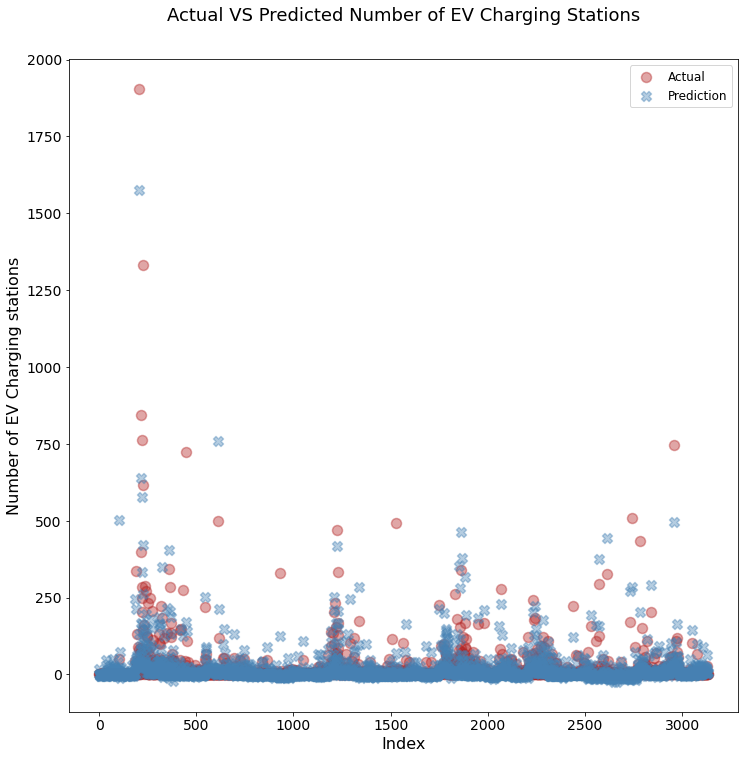

In [50]:
#Scatter Plot

fig, ax = plt.subplots(figsize = (12,12))
ev = ax.scatter(predY.index, predY['EV_Number'], color = "firebrick", marker = "o", linewidths=1.5, s=100, alpha = 0.4)
pred = ax.scatter(predY.index, predY['prediction'], color = "steelblue", marker = "X", linewidths=1.5, s=100, alpha = 0.4)

ax.set_xlabel("Index",fontsize=16)
ax.set_ylabel("Number of EV Charging stations" , fontsize=16)


plt.legend((ev, pred), 
           ('Actual', 'Prediction'),
           scatterpoints=1,
           loc= 'upper right', ncol =1, fontsize = 12)


plt.title('Actual VS Predicted Number of EV Charging Stations', y = 1.05, fontsize=18)
plt.show()

In [51]:
Y = dfev['EV_Number']
Y = pd.DataFrame(Y)

In [52]:
X = df_ev.loc[:,['Population', 'Median_Household_Income', 'Avg_Commute_Time', 'Median_Real_Estate',
       'Married_15_34', 'Married_35_64', 'Gas_Price',
       'Avg_Electric_Price', 'Sales_Tax_Ratio', 'Food_Environment_Index',
       'Physical_Inactivity_Rate', 'Avg_Violent_Crime', 'Violent_Crime_Rate',
       'Number_of_Drive_Alone', 'Cost_Index', 'Grocery_Cost', 'Housing_Cost',
       'Utilities_Cost', 'Transportation_Cost']]
X.head()

,Population,Median_Household_Income,Avg_Commute_Time,Median_Real_Estate,Married_15_34,Married_35_64,Gas_Price,Avg_Electric_Price,Sales_Tax_Ratio,Food_Environment_Index,Physical_Inactivity_Rate,Avg_Violent_Crime,Violent_Crime_Rate,Number_of_Drive_Alone,Cost_Index,Grocery_Cost,Housing_Cost,Utilities_Cost,Transportation_Cost
0,55869,58233.0,24.9,160200.0,1979.0,7205.0,2.64,9.83,0.04,6.7,0.306,148.5,272.282220,24635,89.3,97.4,71.5,103.3,88.6
1,223234,59871.0,24.9,231100.0,5258.0,24656.0,2.64,9.83,0.04,7.8,0.247,408.0,203.660396,93141,89.3,97.4,71.5,103.3,88.6
2,24686,35972.0,24.9,94000.0,528.0,2164.0,2.64,9.83,0.04,5.5,0.280,105.5,414.277861,8231,89.3,97.4,71.5,103.3,88.6
3,22394,47918.0,24.9,97200.0,389.0,2269.0,2.64,9.83,0.04,7.6,0.334,19.5,89.349126,8167,89.3,97.4,71.5,103.3,88.6
4,57826,52902.0,24.9,133800.0,1692.0,7309.0,2.64,9.83,0.04,7.9,0.333,279.0,482.690611,21690,89.3,97.4,71.5,103.3,88.6


In [53]:
Y = df_ev['EV_Number']
Y = pd.DataFrame(Y)
Y.head()

,EV_Number
0,0
1,0
2,0
3,0
4,0


# Model 2: Decision tree

##Check the r square and p value

In [54]:
import statsmodels.api as sm

In [55]:
mod = sm.OLS(Y, X)
mod_result = mod.fit()
print(mod_result.summary())

                                 OLS Regression Results                                
Dep. Variable:              EV_Number   R-squared (uncentered):                   0.734
Model:                            OLS   Adj. R-squared (uncentered):              0.733
Method:                 Least Squares   F-statistic:                              452.6
Date:                Sun, 20 Jun 2021   Prob (F-statistic):                        0.00
Time:                        13:18:09   Log-Likelihood:                         -15413.
No. Observations:                3131   AIC:                                  3.086e+04
Df Residuals:                    3112   BIC:                                  3.098e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [56]:
X = X.loc[:,['Population', 'Median_Household_Income', 'Avg_Commute_Time', 'Median_Real_Estate', 'Married_15_34', 'Married_35_64', 'Gas_Price', 'Violent_Crime_Rate', 'Number_of_Drive_Alone', 'Cost_Index']]

In [57]:
mod = sm.OLS(Y, X)
mod_result = mod.fit()
print(mod_result.summary())

                                 OLS Regression Results                                
Dep. Variable:              EV_Number   R-squared (uncentered):                   0.728
Model:                            OLS   Adj. R-squared (uncentered):              0.727
Method:                 Least Squares   F-statistic:                              834.3
Date:                Sun, 20 Jun 2021   Prob (F-statistic):                        0.00
Time:                        13:18:09   Log-Likelihood:                         -15451.
No. Observations:                3131   AIC:                                  3.092e+04
Df Residuals:                    3121   BIC:                                  3.098e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

## Set a threshold for ev station number

In [58]:
# Check the distribution of target variable
Y.describe()

,EV_Number
count,3131.000000
mean,13.768764
std,63.004834
min,0.000000
25%,0.000000
50%,2.000000
75%,7.000000
max,1904.000000


In [59]:
# According to the average ev station number from describe, we choose 14 as the threshold
Y[Y <= 15] = 1

In [60]:
Y[Y > 15] = 0

In [61]:
Y.value_counts()

EV_Number
1            2698
0             433
dtype: int64

##Bin all of the 10 features

In [62]:
X.head()

,Population,Median_Household_Income,Avg_Commute_Time,Median_Real_Estate,Married_15_34,Married_35_64,Gas_Price,Violent_Crime_Rate,Number_of_Drive_Alone,Cost_Index
0,55869,58233.0,24.9,160200.0,1979.0,7205.0,2.64,272.282220,24635,89.3
1,223234,59871.0,24.9,231100.0,5258.0,24656.0,2.64,203.660396,93141,89.3
2,24686,35972.0,24.9,94000.0,528.0,2164.0,2.64,414.277861,8231,89.3
3,22394,47918.0,24.9,97200.0,389.0,2269.0,2.64,89.349126,8167,89.3
4,57826,52902.0,24.9,133800.0,1692.0,7309.0,2.64,482.690611,21690,89.3


In [63]:
X.describe()

,Population,Median_Household_Income,Avg_Commute_Time,Median_Real_Estate,Married_15_34,Married_35_64,Gas_Price,Violent_Crime_Rate,Number_of_Drive_Alone,Cost_Index
count,3.131000e+03,3131.000000,3131.000000,3.131000e+03,3131.000000,3.131000e+03,3131.000000,3131.000000,3.131000e+03,3131.000000
mean,1.046833e+05,55725.468860,24.576653,1.650430e+05,2650.939317,1.159534e+04,2.780930,236.810841,4.871651e+04,97.308687
std,3.340067e+05,14495.266087,3.684810,1.067570e+05,7737.531761,3.523572e+04,0.228621,196.173819,1.598931e+05,14.035170
min,1.690000e+02,24732.000000,17.200000,2.640000e+04,0.000000,1.200000e+01,2.576000,0.000000,3.300000e+01,86.100000
25%,1.090400e+04,46249.000000,22.200000,1.013500e+05,282.500000,1.248500e+03,2.640000,103.609656,4.499500e+03,89.200000
50%,2.575800e+04,53319.000000,24.800000,1.344000e+05,678.000000,2.954000e+03,2.708000,189.132748,1.073100e+04,91.500000
75%,6.811000e+04,62072.000000,26.600000,1.903500e+05,1858.000000,7.775000e+03,2.798000,323.937263,2.988050e+04,99.800000
max,1.003911e+07,151806.000000,33.600000,1.176700e+06,180853.000000,1.017460e+06,3.936000,1819.514407,4.811408e+06,192.900000


In [64]:
X['Population'] = pd.cut(x=X['Population'], bins=[165, 10904, 25758, 68110, 10040000], labels=['1', '2', '3','4'])

In [65]:
X['Median_Household_Income'] = pd.cut(x=X['Median_Household_Income'], bins=[24730, 46249, 53319, 62072, 151810], labels=['1', '2', '3','4'])

In [66]:
X['Avg_Commute_Time'] = pd.cut(x=X['Avg_Commute_Time'], bins=[16, 22.2, 24.8, 26.6, 34], labels=['1', '2', '3','4'])

In [67]:
X['Median_Real_Estate'] = pd.cut(x=X['Median_Real_Estate'], bins=[-np.inf, 101350, 134400, 190350, np.inf], labels=['1', '2', '3','4'])

In [68]:
X['Married_15_34'] = pd.cut(x=X['Married_15_34'], bins=[-np.inf, 283, 678, 1858, np.inf], labels=['1', '2', '3','4'])

In [69]:
X['Married_35_64'] = pd.cut(x=X['Married_35_64'], bins=[11, 1248, 2954, 7775, 1017465], labels=['1', '2', '3','4'])

In [70]:
X['Gas_Price'] = pd.cut(x=X['Gas_Price'], bins=[2.100, 2.640, 2.708, 2.798, 4.00], labels=['1', '2', '3','4'])

In [71]:
X['Violent_Crime_Rate'] = pd.cut(x=X['Violent_Crime_Rate'], bins=[-np.inf, 103.6, 189.132, 323.93, np.inf], labels=['1', '2', '3','4'])

In [72]:
X['Number_of_Drive_Alone'] = pd.cut(x=X['Number_of_Drive_Alone'], bins=[30, 4499, 10731, 29880, 4900000], labels=['1', '2', '3','4'])

In [73]:
X['Cost_Index'] = pd.cut(x=X['Cost_Index'], bins=[85.1, 89.2, 91.5, 99.8, 193.9], labels=['1', '2', '3','4'])

In [74]:
X.isnull().sum()

Population                 0
Median_Household_Income    0
Avg_Commute_Time           0
Median_Real_Estate         0
Married_15_34              0
Married_35_64              0
Gas_Price                  0
Violent_Crime_Rate         0
Number_of_Drive_Alone      0
Cost_Index                 0
dtype: int64

## Decision tree model tuning



In [75]:
#Splite the model for test and train dataset
from sklearn.model_selection import train_test_split

# split into train test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2191, 10) (940, 10) (2191, 1) (940, 1)


In [76]:
#Import visualization package
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as pltpy
import seaborn as sn
from matplotlib.pyplot import figure

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [77]:
#Sklearn packages
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn import metrics

In [78]:
# Train the dtree model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 10,
                               random_state = 101,
                               max_features = None,
                               min_samples_leaf = 15)
dtree.fit(X_train, Y_train)
Y_pred = dtree.predict(X_test)   

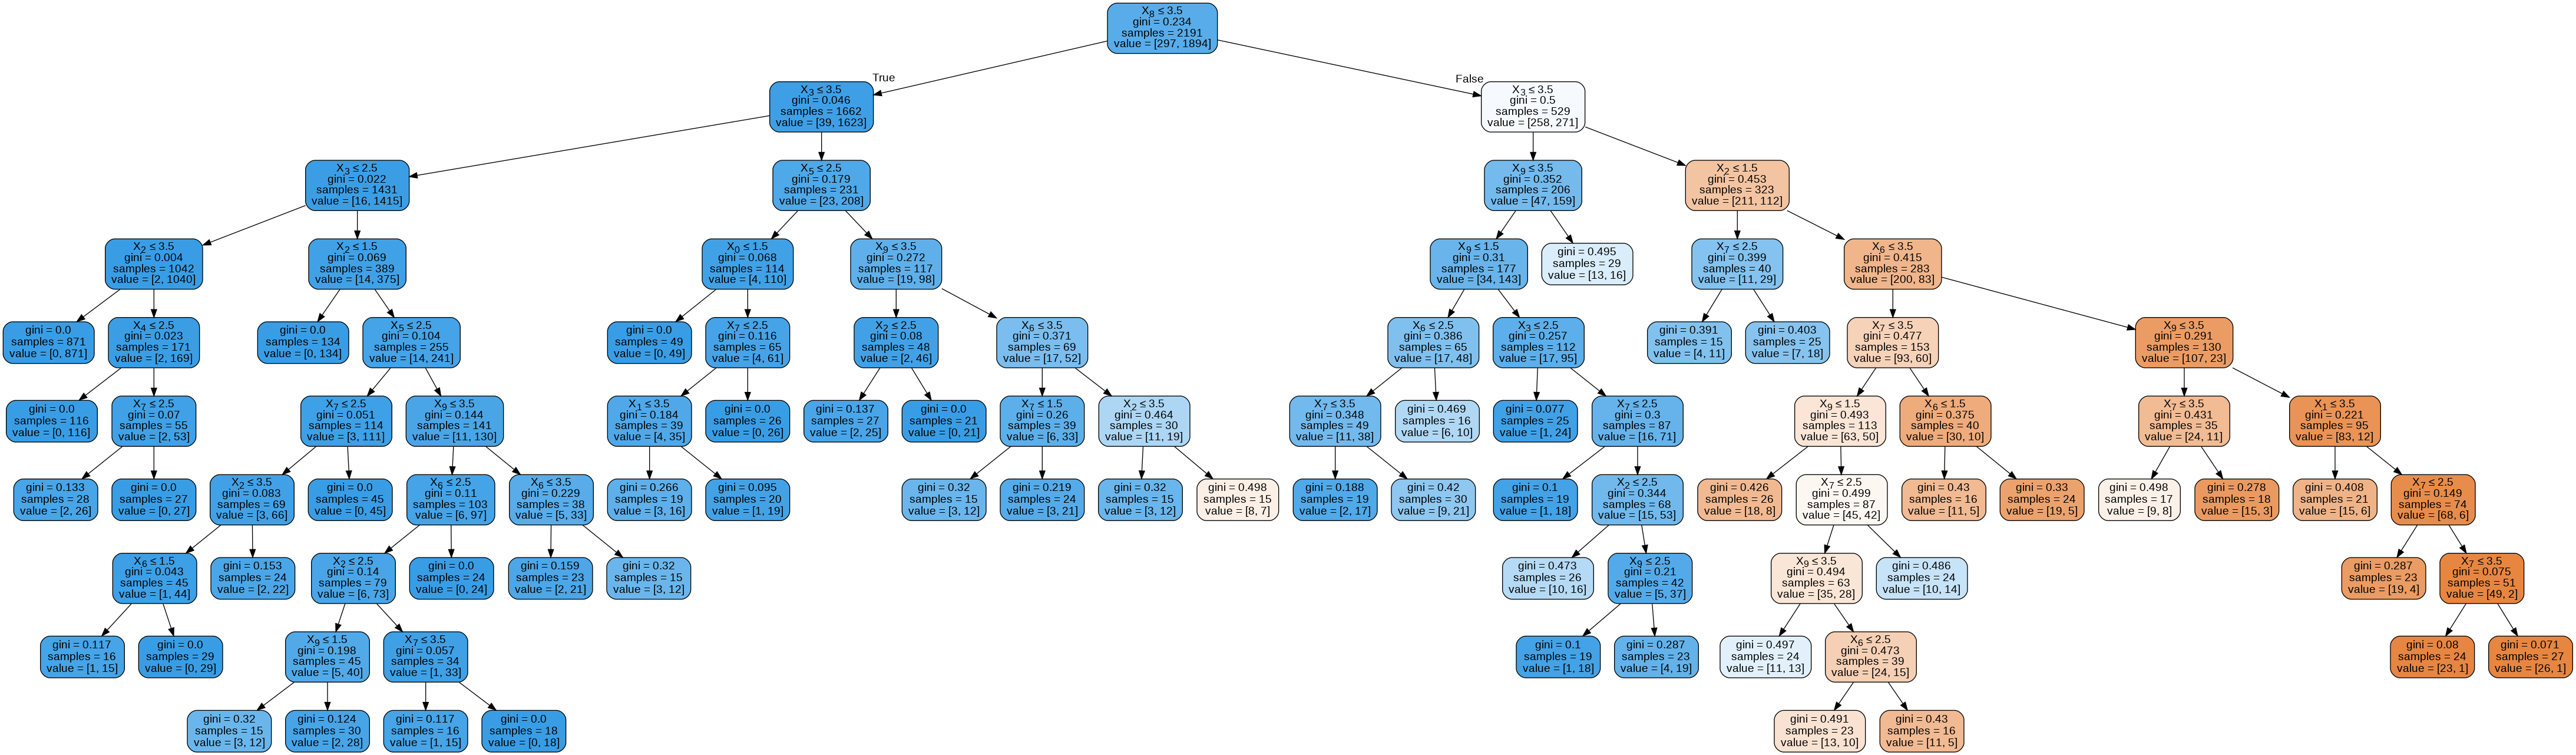

In [79]:
#create decision tree viz

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [80]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[ 81  55]
 [ 33 771]]
              precision    recall  f1-score   support

           0       0.71      0.60      0.65       136
           1       0.93      0.96      0.95       804

    accuracy                           0.91       940
   macro avg       0.82      0.78      0.80       940
weighted avg       0.90      0.91      0.90       940



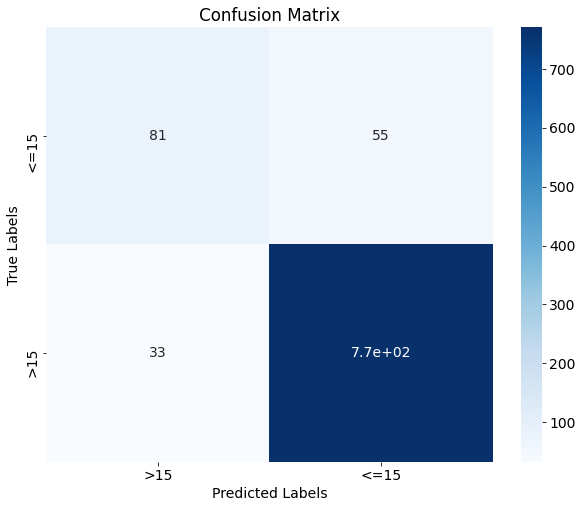

In [81]:
cm = confusion_matrix(Y_test, Y_pred)

fig, ax = pltpy.subplots(1, figsize = (10,8))

sns.heatmap(cm, annot= True, ax = ax, cmap = 'Blues')

ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels([">15", "<=15"]); 
ax.yaxis.set_ticklabels(["<=15", ">15"]);

In [82]:
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
(tn, fp, fn, tp)

(81, 55, 33, 771)

In [83]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
auc = roc_auc_score(Y_test, Y_pred)
auc

0.7772717295873574

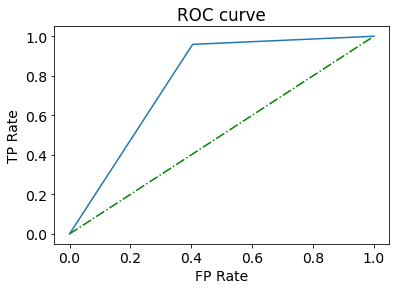

In [84]:
plt.plot([0,1],[0,1],'y-.', c='g')
plt.plot(fpr, tpr)
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC curve')
plt.show()

In [85]:
#model trail 1
dtree = DecisionTreeClassifier(criterion= 'entropy', min_samples_split = 10, min_samples_leaf = 10, max_depth=4)
dtree.fit(X_train, Y_train)
Y_pred=dtree.predict(X_test)
confusion_matrix(Y_test, Y_pred)
print('accuracy socre: ', accuracy_score(Y_test, Y_pred))
print('recall socre: ', recall_score(Y_test, Y_pred))
print('precision socre: ', precision_score(Y_test, Y_pred))
print('f1 score: ', f1_score(Y_test, Y_pred))

accuracy socre:  0.9042553191489362
recall socre:  0.9378109452736318
precision socre:  0.9496221662468514
f1 score:  0.9436795994993742


In [86]:
#model trail 2
dtree = DecisionTreeClassifier(criterion= 'gini', min_samples_split = 3, min_samples_leaf = 10, max_depth=5)
dtree.fit(X_train, Y_train)
Y_pred=dtree.predict(X_test)
confusion_matrix(Y_test, Y_pred)
print('accuracy socre: ', accuracy_score(Y_test, Y_pred))
print('recall socre: ', recall_score(Y_test, Y_pred,))
print('precision socre: ', precision_score(Y_test, Y_pred))
print('f1 score: ', f1_score(Y_test, Y_pred))

accuracy socre:  0.9042553191489362
recall socre:  0.9378109452736318
precision socre:  0.9496221662468514
f1 score:  0.9436795994993742


## Auto Tuning

In [87]:
#read auto tunning csv
auto= pd.read_csv('https://raw.githubusercontent.com/MandyHe/EV_Charging_Prediction/main/auto.csv')

In [88]:
def model():
  for index, row in auto.iterrows():
    if row["Split Criteria"] == "entropy":
      dtree = DecisionTreeClassifier(criterion = 'entropy', 
                                     random_state=101, 
                                     max_features= None, 
                                     min_samples_split=row["Minimum Sample Split"], 
                                     min_samples_leaf = row["Minimum Sample Leaf"], 
                                     max_depth = row["Maximum Depth"])
      dtree.fit(X_test, Y_test)

      Y_pred = dtree.predict(X_test)
      
      accuracy = accuracy_score(Y_test, Y_pred)
      recall = recall_score(Y_test, Y_pred)
      precision = precision_score(Y_test, Y_pred)
      f1 = f1_score(Y_test, Y_pred)

      auto.at[index, 'Accuracy'] = accuracy
      auto.at[index, 'Recall'] = recall
      auto.at[index, 'Precision'] = precision
      auto.at[index, 'F1Score'] = f1

    elif row["Split Criteria"] == "gini":
      dtree = DecisionTreeClassifier(criterion = 'gini', 
                                     random_state=101, 
                                     max_features= None, 
                                     min_samples_split=row["Minimum Sample Split"], 
                                     min_samples_leaf = row["Minimum Sample Leaf"], 
                                     max_depth = row["Maximum Depth"])
      dtree.fit(X_test, Y_test)

      Y_pred = dtree.predict(X_test)

      accuracy = accuracy_score(Y_test, Y_pred)
      recall = recall_score(Y_test, Y_pred)
      precision = precision_score(Y_test, Y_pred)
      f1 = f1_score(Y_test, Y_pred)

      auto.at[index, 'Accuracy'] = accuracy
      auto.at[index, 'Recall'] = recall
      auto.at[index, 'Precision'] = precision
      auto.at[index, 'F1Score'] = f1


model()
print(auto)
auto.head(8)

  Split Criteria  Minimum Sample Split  ...  Precision   F1Score
0        entropy                    10  ...   0.939320  0.950860
1        entropy                     3  ...   0.939320  0.950860
2        entropy                    10  ...   0.946012  0.952440
3        entropy                    10  ...   0.952736  0.952736
4           gini                    10  ...   0.939320  0.950860
5           gini                     3  ...   0.939320  0.950860
6           gini                    10  ...   0.946012  0.952440
7           gini                    10  ...   0.952736  0.952736

[8 rows x 8 columns]


,Split Criteria,Minimum Sample Split,Minimum Sample Leaf,Maximum Depth,Accuracy,Recall,Precision,F1Score
0,entropy,10,10,4,0.914894,0.962687,0.939320,0.950860
1,entropy,3,10,4,0.914894,0.962687,0.939320,0.950860
2,entropy,10,7,4,0.918085,0.958955,0.946012,0.952440
3,entropy,10,10,6,0.919149,0.952736,0.952736,0.952736
4,gini,10,10,4,0.914894,0.962687,0.939320,0.950860
5,gini,3,10,4,0.914894,0.962687,0.939320,0.950860
6,gini,10,7,4,0.918085,0.958955,0.946012,0.952440
7,gini,10,10,6,0.919149,0.952736,0.952736,0.952736


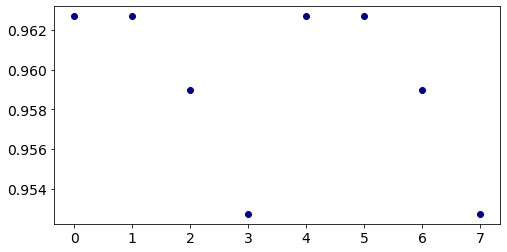

In [89]:
plt.figure(figsize=(8,4))
plt.scatter(auto.index, auto.Recall, color = "darkblue", label = 'Recall')

In [90]:
besttree = DecisionTreeClassifier(criterion = 'gini', random_state=101, max_features= None, min_samples_split=10, min_samples_leaf = 10, max_depth = 4)
besttree.fit(X_test, Y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

In [91]:
besttree.predict([[1, 1, 2, 3, 1, 1, 4, 1, 3, 1]])

array([1])

In [92]:
besttree.predict_proba([[1, 1, 2, 3, 1, 1, 4, 1, 3, 1]])

array([[0.01176471, 0.98823529]])

##Recommendation system

In [93]:
def predictor(Population, 
              Median_Household_Income, 
              Avg_Commute_Time, 
              Median_Real_Estate, 
              Married_15_34, 
              Married_35_64, 
              Gas_Price,
              Violent_Crime_Rate, 
              Number_of_Drive_Alone,
              Cost_Index):
  variable = []

  Population = (1 if 165 <= Population < 10904
           else 2 if 10904 <= Population < 25758 
           else 3 if 25758 <= Population < 68110 
           else 4 )
  
  Median_Household_Income = (1 if 24730 <= Median_Household_Income < 46249
           else 2 if 46249 <= Median_Household_Income < 53319
           else 3 if 53319 <= Median_Household_Income < 62072
           else 4 )
  
  Avg_Commute_Time = (1 if 16 <= Avg_Commute_Time < 22.2
           else 2 if 22.2 <= Avg_Commute_Time < 24.8
           else 3 if 24.8 <= Avg_Commute_Time < 26.6
           else 4 )
  
  Median_Real_Estate = (1 if 0 <= Median_Real_Estate < 101350
           else 2 if 101350 <= Median_Real_Estate < 134400
           else 3 if 134400 <= Median_Real_Estate < 190350
           else 4 )
  
  Married_15_34 = (1 if 0 <= Married_15_34 < 283
           else 2 if 283 <= Married_15_34 < 678
           else 3 if 678 <= Married_15_34 < 1858
           else 4 )
  
  Married_35_64 = (1 if 10 <= Married_35_64 < 1248
           else 2 if 1248 <= Married_35_64 < 2954
           else 3 if 2954 <= Married_35_64 < 7775
           else 4 )
  
  Gas_Price = (1 if 2.100 <= Gas_Price < 8.78
           else 2 if 8.78 <= Gas_Price < 9.56
           else 3 if 9.56 <= Gas_Price < 10.02
           else 4 )
  
 
  Violent_Crime_Rate = (1 if 0 <= Violent_Crime_Rate < 103.6
           else 2 if 103.6 <= Violent_Crime_Rate < 189.132
           else 3 if 189.132 <= Violent_Crime_Rate < 323.93
           else 4 )
  
  Number_of_Drive_Alone = (1 if 30 <= Number_of_Drive_Alone < 4499
           else 2 if 4499 <= Number_of_Drive_Alone < 10731
           else 3 if 10731 <= Number_of_Drive_Alone < 29880
           else 4 )
  
  Cost_Index = (1 if 85.1 <= Cost_Index < 89.2
           else 2 if 89.2 <= Cost_Index < 91.5
           else 3 if 91.5 <= Cost_Index < 99.8
           else 4 )

  variables = [Population, 
              Median_Household_Income, 
              Avg_Commute_Time, 
              Median_Real_Estate, 
              Married_15_34, 
              Married_35_64, 
              Gas_Price,
              Violent_Crime_Rate, 
              Number_of_Drive_Alone,
              Cost_Index]
  variable.append(variables)
  return list(variable)


county = predictor(200000, 34560, 30, 200000, 678, 7771, 2.590, 190, 5000, 100)
county

[[4, 1, 4, 4, 3, 3, 1, 3, 2, 4]]

In [94]:
besttree.predict(county)

array([1])

In [95]:
besttree.predict_proba(county)

array([[0., 1.]])

In [96]:
prob = besttree.predict_proba(county)
prob = pd.DataFrame(prob)
prob.columns = [">15", "<=15"]
prob.head()

,>15,<=15
0,0.0,1.0


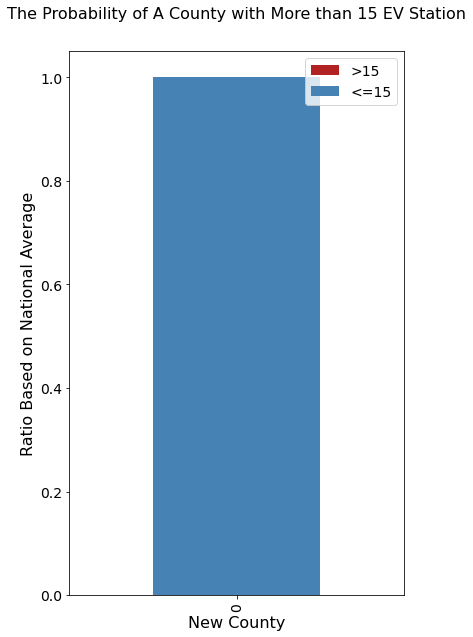

In [97]:
fig, ax = plt.subplots()
prob.plot(kind = "bar", stacked = True, figsize = (6,10), ax = ax, color = ['firebrick', 'steelblue'], width = 0.5)
ax.legend(['>15', '<=15'])
plt.title('The Probability of A County with More than 15 EV Station', fontsize = 16, y = 1.05)
plt.xlabel('New County', fontsize = 16)
plt.ylabel('Ratio Based on National Average', fontsize = 16)
plt.show()

